-----

### 1. [NLP] 단어의 위치 정보를 인코딩하기

**문제 제시:**
트랜스포머(Transformer) 모델은 단어의 순서를 이해하지 못합니다. 이를 해결하기 위해 각 단어의 위치마다 고유한 값을 더해주는 '위치 인코딩(Positional Encoding)'을 사용합니다. `sin`, `cos` 함수를 이용해 5개의 단어(pos)와 4개의 차원(i)을 가진 위치 인코딩 행렬을 생성하는 코드를 작성하세요.



트랜스포머 모델은 각 단어들을 순차적으로 보는것이아니라 위에서 내려다 봄<br>
포지션에 대한 임베팅도 한다.
삼각함수는

In [ ]:
import numpy as np

def get_positional_encoding(max_pos=5, d_model=4):
    """위치 인코딩 행렬을 계산하는 함수"""
    # 비어있는 (5, 4) 행렬 생성
    pos_encoding = np.zeros((max_pos, d_model))

    for pos in range(max_pos): # 0~4번 단어 위치
        for i in range(0, d_model, 2):
            # sin 함수는 짝수 인덱스에 적용
            pos_encoding[pos, i] = np.sin(pos / (10000 ** (i / d_model)))  #여기
            # cos 함수는 홀수 인덱스에 적용
            pos_encoding[pos, i+1] = np.cos(pos / (10000 ** (i / d_model)))  #여기

    return pos_encoding

positional_encoding = get_positional_encoding()
print("생성된 위치 인코딩 행렬:")
print(positional_encoding)

생성된 위치 인코딩 행렬:
[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.00999983  0.99995   ]
 [ 0.90929743 -0.41614684  0.01999867  0.99980001]
 [ 0.14112001 -0.9899925   0.0299955   0.99955003]
 [-0.7568025  -0.65364362  0.03998933  0.99920011]]


In [ ]:
import matplotlib.pyplot as plt

# 시각화를 위해 단어 수와 차원을 늘려서 생성
#positional_encoding = get_positional_encoding(max_pos=50, d_model=128)

# 히트맵 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(positional_encoding, cmap='viridis')
plt.xlabel('Embedding Dimension (i)')
plt.ylabel('Word Position (pos)')
plt.title('Positional Encoding')
plt.colorbar()
plt.show()

**AI 연계 개념:**
**위치 인코딩 (Positional Encoding):** 트랜스포머 모델에서 단어의 상대적인 위치 정보를 알려주는 핵심 기술입니다. 주기적인 성질을 가진 `sin`, `cos` 함수를 사용하면, 모델은 단어 간의 거리와 순서를 학습하여 "I love you"와 "You love I"의 차이를 이해할 수 있게 됩니다.



-----

###2. [Computer Vision] 이미지 특징 벡터 회전시키기

**문제 제시:**
이미지 속 객체가 회전하더라도 인공지능이 동일한 객체로 인식하게 하려면 '회전 불변성'이 중요합니다. 2차원 특징 벡터 `[1, 0]`을 **30도($\frac{\pi}{6}$ 라디안)** 회전시키는 2x2 회전 행렬을 삼각함수로 만들고, 행렬 곱을 이용해 회전된 벡터를 계산하세요.



In [ ]:
import numpy as np

# 원본 특징 벡터
feature_vector = np.array([1, 0])
# 회전각 (30도)
#theta = np.pi / 6   #30*(np.pi/180)
theta = np.deg2rad(30)  #여기

# 여기(회전행렬 만들기)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta),  np.cos(theta)]])

# 여기 (회전하기)
rotated_vector = feature_vector @ rotation_matrix
print(f"원본 벡터: {feature_vector}")
print(f"30도 회전 후 벡터: {rotated_vector.round(4)}")

원본 벡터: [1 0]
30도 회전 후 벡터: [ 0.866 -0.5  ]


**AI 연계 개념:**
**데이터 증강 (Data Augmentation):** 인공지능 모델, 특히 CNN(합성곱 신경망)을 훈련시킬 때, 원본 이미지를 회전, 확대, 반전시켜 데이터의 양을 늘립니다. 삼각함수로 정의된 회전 행렬은 이러한 데이터 증강의 수학적 기초이며, 모델이 다양한 각도의 객체를 학습하여 **회전 불변성**을 갖도록 돕습니다.



-----

###3. [Feature Engineering] 시간에 주기성을 부여하기

**문제 제시:**
시간 데이터(예: 1월\~12월)를 숫자로만 표현하면, 12월과 1월이 멀리 떨어진 값으로 인식되는 문제가 있습니다. `sin`, `cos` 함수를 이용해 **12개월** 데이터를 2차원 원 위의 점으로 변환하여 12월과 1월이 가깝게 표현되도록 만들어 보세요.



0.87 0.5 month= 1
0.5 0.87 month= 2
0.0 1.0 month= 3
-0.5 0.87 month= 4
-0.87 0.5 month= 5
-1.0 0.0 month= 6
-0.87 -0.5 month= 7
-0.5 -0.87 month= 8
-0.0 -1.0 month= 9
0.5 -0.87 month= 10
0.87 -0.5 month= 11
1.0 -0.0 month= 12


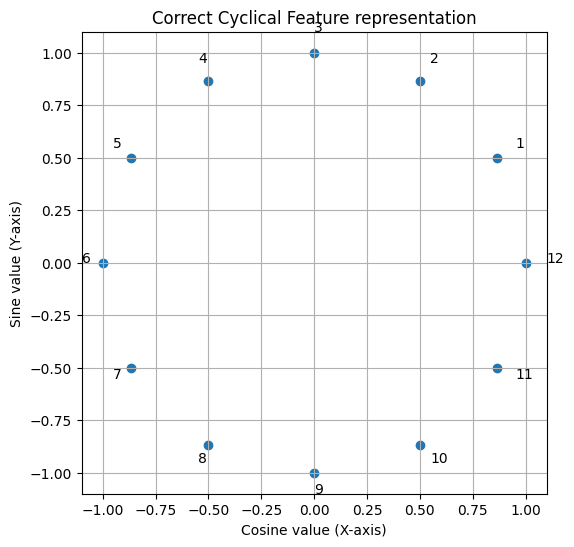

In [ ]:
#수학에서의 방향 x축에 코사인, y축에 사인을 사용 : 이렇게 사용하는 것이 맞음
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 13)

# sin, cos 변환
sin_months = np.sin(2 * np.pi * (months / 12))  #여기
cos_months = np.cos(2 * np.pi * (months / 12))  #여기


# 시각화 (x축과 y축을 올바르게 수정)
plt.figure(figsize=(6, 6))
plt.scatter(cos_months, sin_months) # x축에 cos, y축에 sin
for i, month in enumerate(months):
    print(cos_months[i].round(2), sin_months[i].round(2), "month=", month)
    plt.text(cos_months[i]*1.1, sin_months[i]*1.1, str(month)) # 숫자 글자의 위치는 좌표에 따라 정하기 위해
plt.title("Correct Cyclical Feature representation")
plt.xlabel("Cosine value (X-axis)")
plt.ylabel("Sine value (Y-axis)")
plt.grid(True)
plt.show()

In [ ]:
# 우리가 기대하는 시계 모양으로 하려면 sin_months를 x축에, cos_months를 y축에 놓고


**AI 연계 개념:**
**주기적 특징 공학 (Cyclical Feature Engineering):** 월, 요일, 시간 등 주기성을 가진 데이터를 모델이 잘 학습하도록 변환하는 기법입니다. 삼각함수를 통해 데이터를 원형으로 표현하면, **끝과 시작이 연결**되어 있다는 주기적 특성을 모델에 알려줄 수 있습니다. 이는 계절적 패턴을 예측하는 시계열 모델에서 매우 중요합니다.



-----

###4. [Neural Network] 활성화 함수의 미분 계산

**문제 제시:**
신경망은 역전파(Backpropagation) 과정에서 오차를 줄이기 위해 각 가중치를 얼마나 조절해야 할지 '미분'을 통해 계산합니다. 활성화 함수로 `sin` 함수를 사용했다고 가정할 때, 입력값 `x`에 대한 `sin(x)`의 \*\*미분값(기울기)\*\*을 `cos(x)`를 이용해 계산해 보세요.

**파이썬 코드:**

In [ ]:
import numpy as np

def sin_activation(x):
    """sin 활성화 함수"""
    return np.sin(x)

def sin_derivative(x):
    """sin 활성화 함수의 도함수 (미분)"""
    return np.cos(x)

# 입력값
x = np.pi / 4 # 45도

# 특정 지점에서의 미분값(기울기) 계산
gradient = sin_derivative(x)

print(f"x = {x:.2f} 에서 sin(x)의 기울기(미분값)는 {gradient:.4f} 입니다.")

**AI 연계 개념:**
**역전파 (Backpropagation)와 경사 하강법:** 신경망 학습의 핵심 원리입니다. 예측값과 실제값의 오차를 줄이기 위해, 각 가중치가 오차에 얼마나 영향을 미쳤는지 **미분**을 통해 계산합니다. 삼각함수와 그 도함수의 관계처럼, 활성화 함수의 미분값을 효율적으로 계산하는 것은 전체 학습 속도를 높이는 데 필수적입니다.



-----

### 5. [Audio AI] 여러 주파수의 소리 합성하기

**문제 제시:**
모든 소리는 여러 주파수의 사인파(sine wave)가 합쳐진 것입니다. **주파수 2Hz와 5Hz의 사인파**를 각각 생성한 후, 두 파형을 더하여 복합적인 소리 파형을 만들어 보세요.



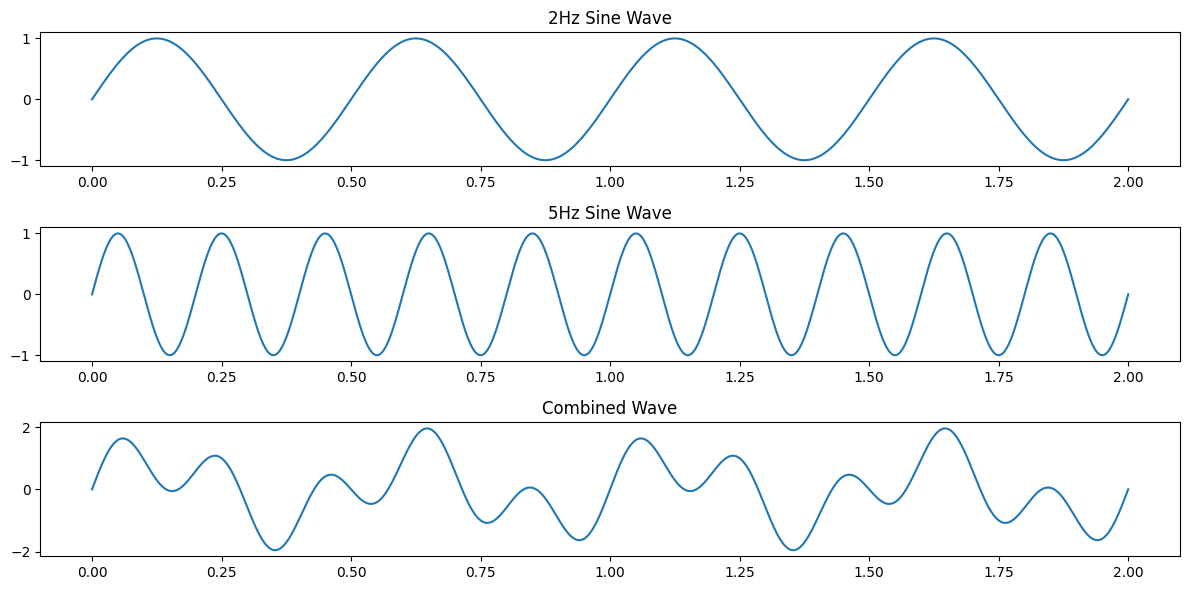

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 축 (0초부터 2초까지, 1000개의 샘플)
time = np.linspace(0, 2, 1000)

# 2Hz 사인파
wave_2hz = np.sin(2 * np.pi * time * 2 )  #여기
# 5Hz 사인파
wave_5hz = np.sin(2 * np.pi * time * 5)   #여기

# 두 파형 합성
combined_wave = wave_2hz + wave_5hz #여기

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, wave_2hz)
plt.title("2Hz Sine Wave")

plt.subplot(3, 1, 2)
plt.plot(time, wave_5hz)
plt.title("5Hz Sine Wave")

plt.subplot(3, 1, 3)
plt.plot(time, combined_wave)
plt.title("Combined Wave")

plt.tight_layout()
plt.show()

**AI 연계 개념:**
**푸리에 변환 (Fourier Transform):** 복잡한 소리나 신호(합성된 파형)를 그것을 구성하는 \*\*기본 주파수 성분(2Hz, 5Hz 사인파)\*\*으로 분해하는 수학적 기법입니다. 음성 인식, 음악 장르 분류 등 오디오 AI 분야에서 소리의 특징을 추출하는 데 핵심적으로 사용되며, 그 기본 원리는 모든 신호가 사인파의 합으로 표현될 수 있다는 것입니다.



-----

### 6. [Robotics] 로봇 팔의 끝점 위치 계산하기

**문제 제시:**
길이가 각각 `L1=1.0`, `L2=0.8`인 두 개의 관절로 이루어진 로봇 팔이 있습니다. 첫 번째 관절이 **45도($\frac{\pi}{4}$)**, 두 번째 관절이 **30도($\frac{\pi}{6}$)** 꺾여있을 때, 로봇 팔의 끝점(end-effector)의 (x, y) 좌표를 계산하세요.



In [ ]:
import numpy as np

L1, L2 = 1.0, 0.8
theta1 = np.pi / 4
theta2 = np.pi / 6

# 첫 번째 관절의 위치
x1 = L1 * np.cos(theta1) #여기
y1 = L1 * np.sin(theta1) #여기

# 최종 끝점의 위치
x2 = x1 + (L2 * np.cos(theta1 + theta2))#여기
y2 = y1 + (L2 * np.sin(theta1 + theta2))#여기

print(f"첫 번째 관절 위치: ({x1:.2f}, {y1:.2f})")
print(f"로봇 팔 끝점 위치: ({x2:.2f}, {y2:.2f})")

첫 번째 관절 위치: (0.71, 0.71)
로봇 팔 끝점 위치: (0.91, 1.48)


**AI 연계 개념:**
**순방향 기구학 (Forward Kinematics):** 로봇 공학에서 각 관절의 각도를 알 때, 로봇의 끝점이 어디에 위치하는지 계산하는 문제입니다. 삼각함수는 이러한 좌표 변환의 핵심이며, 강화학습에서 로봇이 특정 작업을 수행하도록 학습시킬 때, 자신의 행동(관절 각도 변화)이 어떤 결과(끝점 위치 변화)를 낳는지 시뮬레이션하는 데 필수적입니다.



-----

### 7. [Generative AI] 주기 함수로 2D 패턴 생성하기

**문제 제시:**
`sin`, `cos` 함수를 조합하여 부드럽고 반복적인 2D 패턴을 생성할 수 있습니다. 100x100 크기의 2D 그리드에서 각 좌표 (x, y)에 대해 `sin(x/10) + cos(y/10)` 값을 계산하여 이미지를 만들어 보세요.



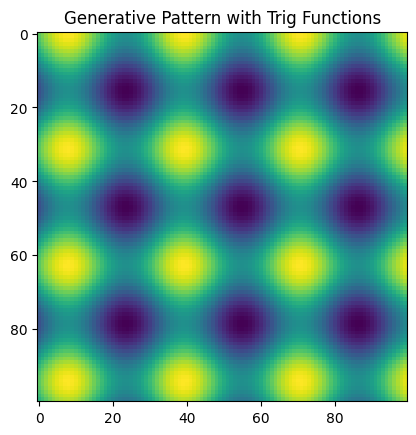

In [2]:
import numpy as np
import matplotlib.pyplot as plt

width, height = 100, 100
image = np.zeros((height, width))

# 각 픽셀 좌표에 대해 값 계산
for y in range(height):
    for x in range(width):
        image[y, x] = np.sin(x / 5) + np.cos(y / 5)

plt.imshow(image, cmap='viridis')
plt.title("Generative Pattern with Trig Functions")
plt.show()

**AI 연계 개념:**
**절차적 생성 (Procedural Generation) 및 GANs:** 게임 배경, 텍스처 등을 자동으로 생성할 때 수학 함수가 자주 사용됩니다. 삼각함수는 자연스럽고 반복적인 패턴을 만드는 데 이상적입니다. 더 나아가, 생성적 적대 신경망(GANs)과 같은 생성 모델은 학습을 통해 이러한 **패턴의 기저에 있는 복잡한 확률 분포**를 학습하여, 노이즈로부터 사실적인 이미지를 생성합니다.



-----

### 8. [Optimization] 경사 하강법 시각화하기

**문제 제시:**
단순한 1차원 `cos` 함수를 비용 함수(Cost Function)라고 가정해 봅시다. 임의의 시작점 `x=2.5`에서 시작하여, 함수의 기울기(미분)를 이용해 점차 함수의 최솟값으로 이동하는 **경사 하강법**의 첫 3단계를 계산하고 시각화하세요. (학습률: 0.4)



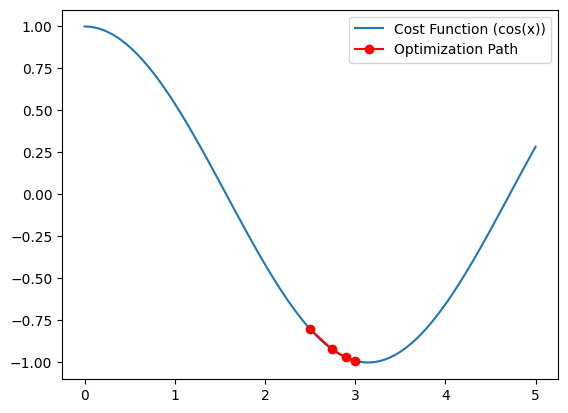

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(x):
    return np.cos(x)

def gradient(x):
    return -np.sin(x) # cos(x)의 미분은 -sin(x)

learning_rate = 0.4
current_x = 2.5
path = [current_x]

# 경사 하강법 3번 반복
for _ in range(3):
    grad = gradient(current_x)
    current_x = current_x - learning_rate * grad #여기
    path.append(current_x)

# 시각화
x_range = np.linspace(0, 5, 100)
plt.plot(x_range, cost_function(x_range), label="Cost Function (cos(x))")
plt.plot(path, cost_function(np.array(path)), 'ro-', label="Optimization Path")
plt.legend()
plt.show()

**AI 연계 개념:**
**최적화 (Optimization):** 모든 머신러닝 모델 학습의 목표는 비용 함수(모델의 오차)를 최소화하는 것입니다. **경사 하강법**은 비용 함수의 현재 위치에서 기울기가 가장 가파른 방향으로 조금씩 이동하여 최솟값을 찾아가는 가장 기본적인 최적화 알고리즘입니다. 삼각함수는 이러한 최적화 과정의 원리를 시각적으로 이해하는 데 훌륭한 예시를 제공합니다.



-----

###9. [Attention Mechanism] 코사인 유사도로 단어 관계 측정하기

**문제 제시:**
두 단어 벡터가 얼마나 유사한 방향을 가리키는지를 측정하는 **코사인 유사도**는 어텐션 메커니즘의 기초가 됩니다. 세 개의 단어 벡터 `v1`, `v2`, `v3`가 있을 때, `v1`이 다른 두 벡터와 각각 얼마나 유사한지 코사인 유사도를 계산하여 비교하세요.



In [3]:
import numpy as np

def cosine_similarity(v_a, v_b):
    """두 벡터 간의 코사인 유사도를 계산하는 함수"""
    dot_product = np.dot(v_a, v_b) #여기
    norm_a = np.linalg.norm(v_a) #여기
    norm_b = np.linalg.norm(v_b) #여기
    return dot_product / (norm_a * norm_b)

v1 = np.array([1, 2, 0]) # "king"
v2 = np.array([1, 1, 0]) # "man" (king과 유사)
v3 = np.array([0, 0, 3]) # "apple" (king과 무관)

sim_v1_v2 = cosine_similarity(v1, v2)
sim_v1_v3 = cosine_similarity(v1, v3)

print(f"'king'과 'man'의 유사도: {sim_v1_v2:.4f}")
print(f"'king'과 'apple'의 유사도: {sim_v1_v3:.4f}")

'king'과 'man'의 유사도: 0.9487
'king'과 'apple'의 유사도: 0.0000


**AI 연계 개념:**
**어텐션 메커니즘 (Attention Mechanism):** 트랜스포머 모델의 핵심 아이디어로, 문장을 번역하거나 생성할 때 특정 단어가 다른 어떤 단어에 더 \*\*'집중(attention)'\*\*해야 하는지를 계산하는 방식입니다. 이 '집중도'는 주로 **코사인 유사도**를 기반으로 계산되며, 두 벡터 사이의 각도($\\theta$)의 코사인 값과 같습니다. 유사도가 높을수록 두 단어의 관련성이 높다고 판단합니다.



-----

###10. [Recommender Systems] 사용자-아이템 행렬 분해

**문제 제시:**
추천 시스템은 사용자와 아이템을 각각 잠재 벡터(latent vector)로 표현합니다. 사용자 벡터와 아이템 벡터의 **내적**이 평점 예측값이 됩니다. 사용자 u의 벡터가 `[cos(a), sin(a)]`, 아이템 i의 벡터가 `[cos(b), sin(b)]`일 때, 예측 평점(내적)을 삼각함수 덧셈정리를 이용해 `cos(a-b)`와 같음을 보여주세요.



In [5]:
import numpy as np

# 임의의 각도 a와 b (사용자와 아이템의 잠재 특징)
a = np.pi / 3  # 60도
b = np.pi / 6  # 30도

# 사용자 및 아이템 벡터 생성
user_vector = np.array([np.cos(a), np.sin(a)])
item_vector = np.array([np.cos(b), np.sin(b)])

# 1. 내적을 이용한 평점 예측
predicted_rating_dot = np.dot(user_vector, item_vector)   #여기

# 2. 삼각함수 덧셈정리를 이용한 계산
# cos(a)cos(b) + sin(a)sin(b) = cos(a-b)
predicted_rating_trig = np.cos(a - b) #여기

print(f"내적을 이용한 예측 평점: {predicted_rating_dot:.4f}")
print(f"덧셈정리를 이용한 예측 평점: {predicted_rating_trig:.4f}")

내적을 이용한 예측 평점: 0.8660
덧셈정리를 이용한 예측 평점: 0.8660


**AI 연계 개념:**
**행렬 분해 (Matrix Factorization):** 추천 시스템의 핵심 알고리즘으로, 거대한 사용자-아이템 평점 행렬을 두 개의 작은 \*\*잠재 특징 행렬(사용자 행렬, 아이템 행렬)\*\*로 분해합니다. 예측 평점은 두 벡터의 내적으로 계산되는데, 이 예시는 두 벡터 사이의 \*\*각도(취향의 차이)\*\*가 예측에 얼마나 중요한지를 기하학적으로 보여줍니다. 각도가 작을수록(`cos(a-b)`가 1에 가까움), 사용자가 아이템을 선호할 확률이 높다고 해석할 수 있습니다.